<div style="text-align: center;">
        <h1>Finansal Veri Analizi: Hareketli Ortalamalarla Ticaret Stratejisi</h1>
</div>

# Projenin Amacı 

<p>Hareketli ortalama gibi teknik göstergeler üzerinde hesaplamalar yaparak alım-satım sinyalleri üretmek. Bu sinyaller, yatırımcıların piyasalardaki trendleri belirleme ve karar alma süreçlerini optimize etme konusunda yardımcı olmak.</p>

# Projenin Temel Fikri

 <p>
       Hareketli ortalama kullanmamın Temel fikri : teknik analizde sıkça kullanılan bir gösterge olan hareketli ortalamanın fiyat hareketlerindeki trendleri belirleme yeteneğini kullanarak alım-satım sinyalleri Üretilebilinmektedir.</p> 
  <p>Hareketli ortalama, belirli bir dönemdeki fiyatların ortalamasını alarak piyasadaki fiyat hareketlerinin yumuşatılmasını sağlar ve trendleri belirlemeye yardımcı olur.</p>

Bu projede, hareketli ortalama üzerinde yapılan hesaplamaları kullanarak alım-satım sinyalleri üretir. Örneğin, <strong>kısa vadeli bir hareketli ortalama ile uzun vadeli bir hareketli ortalamanın kesiştiği noktalar, potansiyel alım veya satım sinyalleri olarak yorumlanabilir.</strong> Bu tür sinyaller, yatırımcılara belirli bir hisse senedi veya finansal varlık üzerinde alım veya satım yapma zamanlaması konusunda yardımcı olabilir.

<p>Bu hesaplamaların temel fikri, fiyat verilerindeki belirli bir trendi belirlemek ve bu trendi takip ederek alım veya satım yapma kararlarını desteklemektir. Böylece, yatırımcılar piyasada olası fiyat değişimlerini öngörebilir ve kararlarını bu doğrultuda şekillendirebilirler.
 </p>

<h3>Geliştiren : Hüseyin Erol<h3>

Kişisel websitem : https://huseyineroll.com/

Github : https://github.com/HuseyinErol24


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import  mplcyberpunk #matplotlib cyberpunk teması için eklendi

# Veri Seti

In [8]:
veri = yf.download("KCHOL.IS",start ="2015-07-22",end="2024-04-26")
#yf kütüphanesi kullanılarak KCHOL verilerini aldık

[*********************100%%**********************]  1 of 1 completed


In [9]:
veri.head(4) # veri setini ilk 4 elemanı

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-22,12.30,12.60,12.3,12.55,10.090219,2437000
2015-07-23,12.50,12.55,12.1,12.20,9.808819,4558027
2015-07-24,12.05,12.25,12.0,12.20,9.808819,2365561
2015-07-27,12.05,12.10,11.9,11.95,9.607818,2582821


In [10]:
veri.tail(4) # veri setini son 4 elemanı

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-19,212.399994,221.500000,211.600006,219.899994,211.755554,15256653
2024-04-22,223.199997,224.000000,214.800003,216.000000,208.000000,15078321
2024-04-24,211.500000,214.699997,209.300003,212.000000,212.000000,12661938
2024-04-25,212.399994,217.500000,212.000000,213.399994,213.399994,13180996


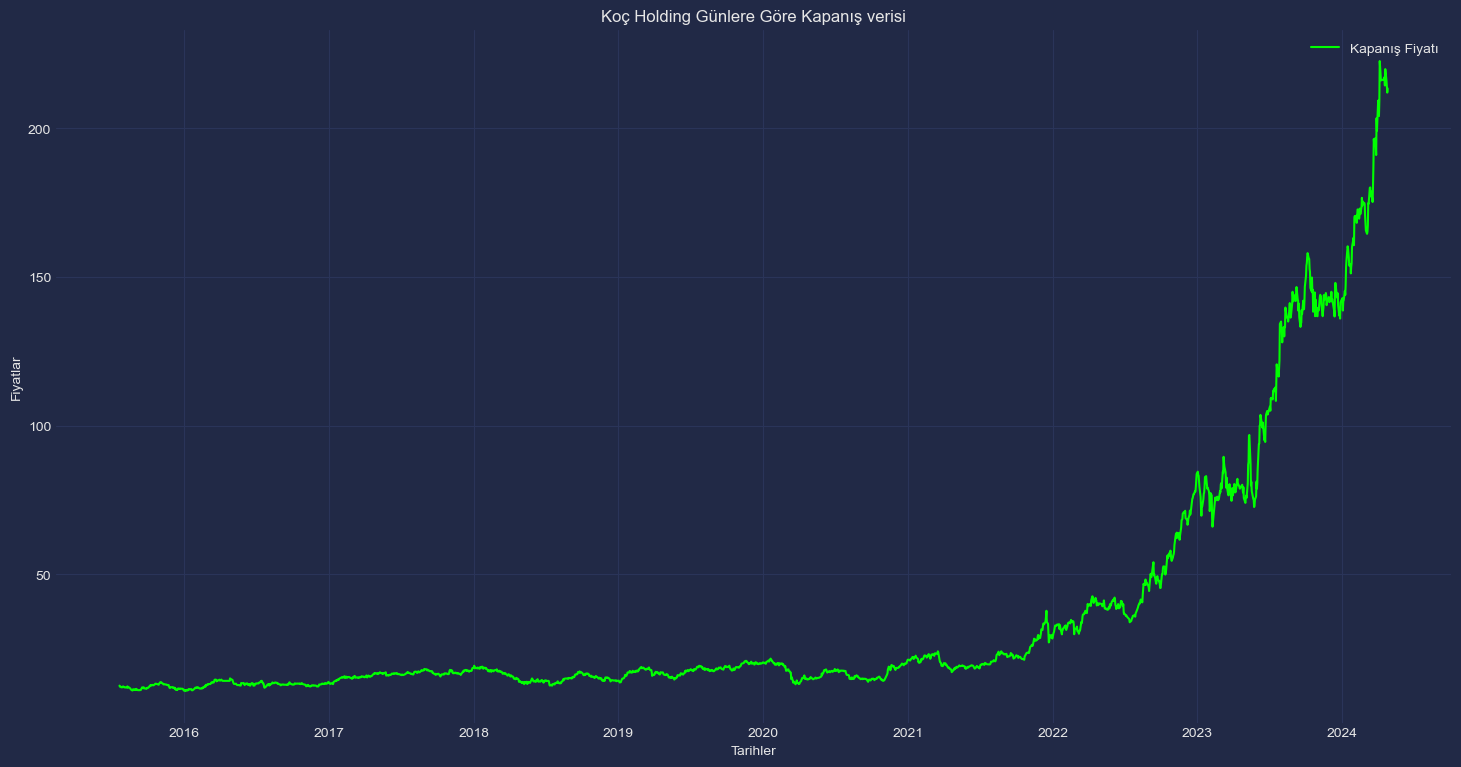

In [14]:
#KCHOL kapanış verileri
plt.figure(figsize=(18,9))
plt.style.use("cyberpunk") # matplotlib cyberpunk temasını kullandım
plt.plot(veri["Close"],label="Kapanış Fiyatı",color="lime")
plt.xlabel("Tarihler")
plt.ylabel("Fiyatlar")
plt.title("Koç Holding Günlere Göre Kapanış verisi")
plt.grid(True)
plt.legend()

In [13]:
veri.describe() # veri setini temel istatistik verileri

,Open,High,Low,Close,Adj Close,Volume
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2.239000e+03
mean,35.800911,36.387660,35.240317,35.807687,33.094652,1.020358e+07
std,41.693716,42.475521,40.979525,41.698889,40.684869,1.005137e+07
min,10.730000,10.900000,10.400000,10.710000,8.610857,0.000000e+00
25%,14.820000,14.950000,14.620000,14.780000,12.641603,3.165681e+06
50%,17.680000,17.860001,17.410000,17.629999,15.293209,6.002866e+06
75%,32.480001,33.030001,31.590000,32.570002,29.979198,1.459874e+07
max,226.000000,226.000000,216.100006,222.600006,214.355560,1.188416e+08


# Hareketli Ortalamaların Hesaplanması

In [47]:
#HARAKETLİ ORTALAMADA BELİRLENEN PERİYOR KADARR TOPLANIP ORTALAMASI ALINIR
veri["14gün"] = veri["Close"].rolling(window = 14).mean()
veri["50gün"] = veri["Close"].rolling(window = 50).mean()
veri["150 gün"] = veri["Close"].rolling(window = 150).mean()
#Bu işlem sonrasından eksik veriler oluşacaktır bu verileri temizliyoruz sonraki adımda

In [16]:
veri.head() # eksik verileri göstermek için 

,Open,High,Low,Close,Adj Close,Volume,14gün,50gün,150 gün
Date,,,,,,,,,
2015-07-22,12.30,12.60,12.3,12.55,10.090219,2437000,NaN,NaN,NaN
2015-07-23,12.50,12.55,12.1,12.20,9.808819,4558027,NaN,NaN,NaN
2015-07-24,12.05,12.25,12.0,12.20,9.808819,2365561,NaN,NaN,NaN
2015-07-27,12.05,12.10,11.9,11.95,9.607818,2582821,NaN,NaN,NaN
2015-07-28,12.10,12.20,12.0,12.00,9.648018,1987512,NaN,NaN,NaN


In [17]:
veri.dropna(inplace=True) #eksik veriyi Temizledim 14-50-150 günlük haraketli ortalamyı hesaplayınca eksik veriler oluştu
# o satırları dropna kullanarak temizledim 

# Hareketli Ortalamalar İle Kapanış Değerleri Arasındaki İlişki

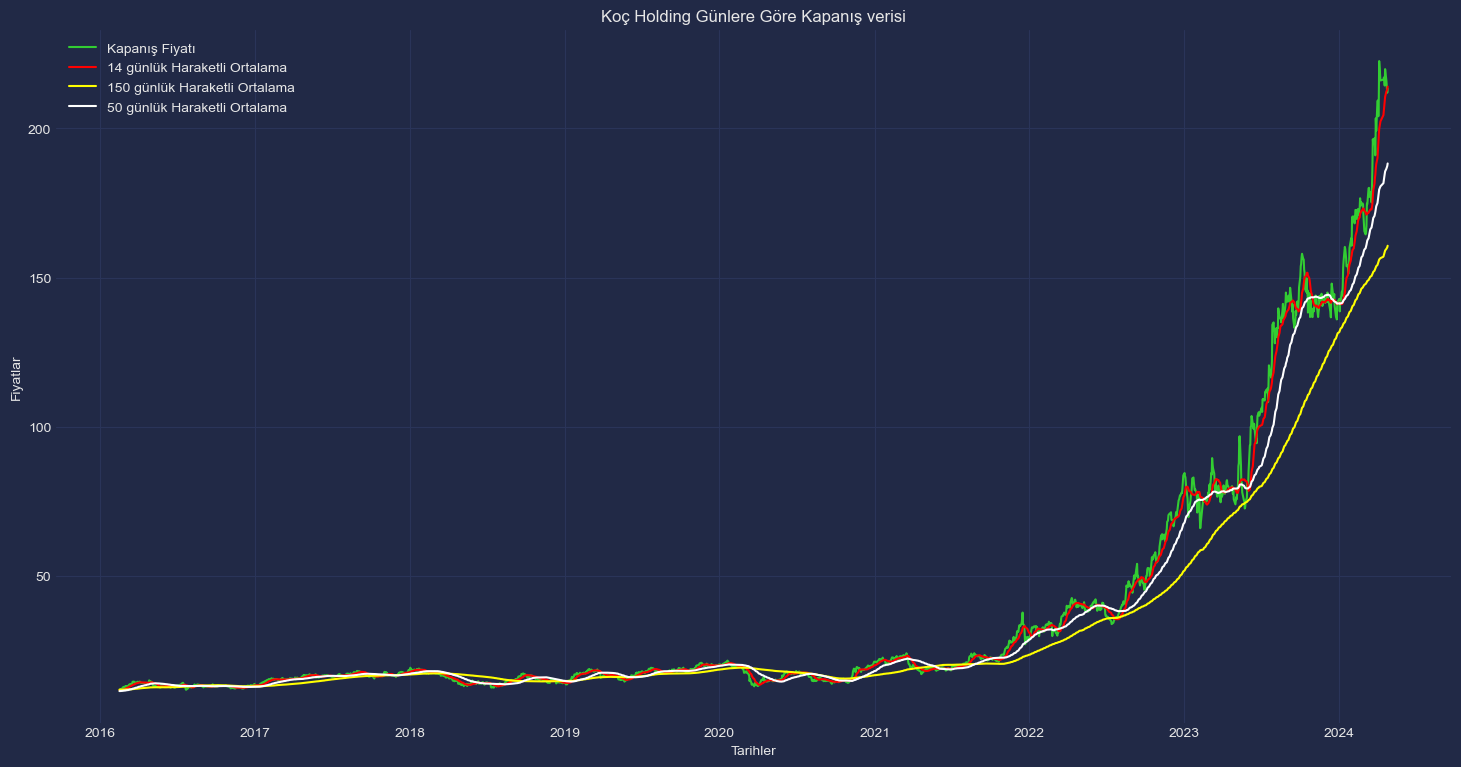

In [19]:
plt.figure(figsize=(18,9))
plt.style.use("cyberpunk")
plt.plot(veri["Close"], label="Kapanış Fiyatı", color="limegreen") 
plt.plot(veri["14gün"], label="14 günlük Haraketli Ortalama", color="red") 
plt.plot(veri["150 gün"], label="150 günlük Haraketli Ortalama", color="yellow")
plt.plot(veri["50gün"], label="50 günlük Haraketli Ortalama", color="white") 
plt.xlabel("Tarihler")
plt.ylabel("Fiyatlar")
plt.title("Koç Holding Günlere Göre Kapanış verisi")
plt.grid(True)
plt.legend()

<h3>Aralarındaki ilişkiyi daha net göre bilmek için son 2 yıla bakalım</h3>

In [20]:
son_2yıl = veri.loc[veri.index > pd.to_datetime('2021-12-31')]#son 2 yıla bakalım grafiği daha net görmek adına

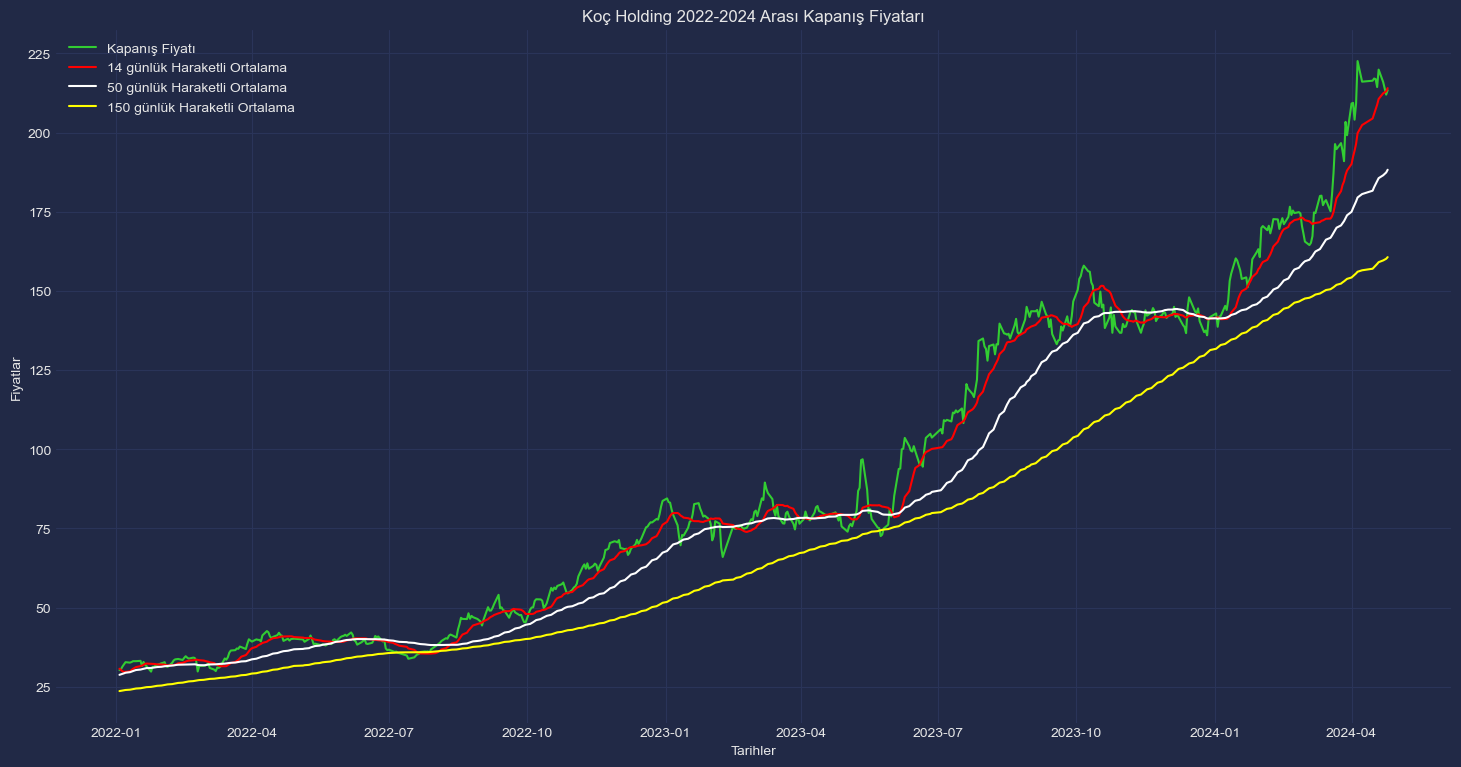

In [22]:
plt.figure(figsize=(18,9))
plt.style.use("cyberpunk")
plt.plot(son_2yıl["Close"], label="Kapanış Fiyatı", color="limegreen") 
plt.plot(son_2yıl["14gün"], label="14 günlük Haraketli Ortalama", color="red")
plt.plot(son_2yıl["50gün"], label="50 günlük Haraketli Ortalama", color="white")
plt.plot(son_2yıl["150 gün"], label="150 günlük Haraketli Ortalama", color="yellow")

plt.xlabel("Tarihler")
plt.ylabel("Fiyatlar")
plt.title("Koç Holding 2022-2024 Arası Kapanış Fiyatarı")
plt.grid(True)
plt.legend()

# Bu grafik, alım ve satım sinyalleri oluşturmak için incelendiğinde kullanışlı bilgiler sağlayabilir.

<p><strong style="color: green;">Alım sinyali:</strong> 14 günlük (kısa vadeli) hareketli ortalama, 50 günlük (uzun vadeli) hareketli ortalamayı yukarı yönlü geçerse, bu bir alım sinyali olabilir. Yani, kısa vadeli ortalama, uzun vadeli ortalamanın üzerine çıkarsa alım sinyali üretebiliriz.</p>

<p><strong style="color: red;">Satış Sinyali:</strong> 14 günlük hareketli ortalama, 50 günlük hareketli ortalamayı aşağı yönlü geçerse, bu bir satış sinyali olabilir. Yani, kısa vadeli ortalama, uzun vadeli ortalamanın altına düşerse satış sinyali üretebiliriz.</p>


# Sinyal Oluşturma Adımları

In [23]:
veri["Sinyal"] = 0 # başlangıç olarak bütün sinyallere 0 verdim

In [24]:
veri["Sinyal"] = np.where(veri["14gün"]>veri["50gün"],1,0)
# 14 günlük ortalama 50 günlük ortalamdan fazalysa al sinyali (1) değilse (0) sinyali döndereceke burası
# 14 günlük ortalama 50 günlük ortalamnın üstündeyse trend yukarı yönlüdür 

In [26]:
veri.groupby("Sinyal").count()

,Open,High,Low,Close,Adj Close,Volume,14gün,50gün,150 gün
Sinyal,,,,,,,,,
0,713,713,713,713,713,713,713,713,713
1,1377,1377,1377,1377,1377,1377,1377,1377,1377


<ul>
  <li>713 tane 0, 1340 günde ise 1 değerini atadık.</li>
  <li>Fakat 1340 günde de al sinyalini olması saçma olur, bu nedenle sonraki sat sinyaline kadar olan kısımları alıcaz. Bu şekilde tam olarak al ve sat noktalarını görebileceğiz.</li>
</ul>

In [27]:
veri["Al Sinyali"] = np.where((veri["Sinyal"] == 1) & (veri["Sinyal"].shift(1) == 0),1,0)
#1 siyallerinden sonra 0 sinyali geliyorsa orası alım noktası olur bu sayede alım noktlarını beliledik
#örnek 11111111110 şeklinde olursa biz burdaki 10  daki 1 e sinyali yerleştiriyoruz kesişim noktlarına yani

In [28]:
veri.loc[veri["Al Sinyali"] == 1][::4]   #hepsini yazdırmadım cok yer kaplıyor :)" 30 adet al sinyali var
#tam bu noktaralarda artık alım sinyalimiz bulunuyor

,Open,High,Low,Close,Adj Close,Volume,14gün,50gün,150 gün,Sinyal,Al Sinyali
Date,,,,,,,,,,,
2016-07-07,13.270000,13.270000,13.270000,13.270000,10.893121,0,13.147143,13.1458,12.787000,1,1
2016-10-19,13.150000,13.310000,13.130000,13.250000,10.876705,6660191,13.129286,13.1244,13.323733,1,1
2017-11-07,17.770000,17.850000,17.290001,17.290001,14.488744,4394489,16.954286,16.9060,16.711800,1,1
2019-01-18,15.560000,16.270000,15.430000,16.190001,13.859112,3790781,14.646429,14.6078,14.841467,1,1
2020-05-13,15.260000,15.280000,15.150000,15.220000,13.566557,5365112,14.945714,14.8998,18.138333,1,1
2022-03-21,37.099998,37.160000,36.419998,36.580002,33.670219,13707366,32.841428,32.6660,28.298267,1,1
2023-04-10,78.099998,80.150002,78.050003,80.000000,77.037041,14430607,78.264285,78.1640,68.502733,1,1
2024-01-02,142.300003,143.300003,140.500000,142.899994,137.607407,13934022,141.557143,141.3660,131.758334,1,1


In [29]:
print("Alım Noktası Adedi : ",len(veri.loc[veri["Al Sinyali"] == 1]))

Alım Noktası Adedi :  30


In [30]:
veri['Satış_Sinyali'] = np.where((veri['Sinyal'] == 0) & (veri['Sinyal'].shift(1) == 1), -1, 0)

In [31]:
veri.loc[veri["Satış_Sinyali"] == -1][::4]  #hepsini yazdırmadım cok yer kaplıyor :)" 30 adet sat sinyali var burda
#tam bu noktaralarda artık satış sinyalimiz bulunuyor

,Open,High,Low,Close,Adj Close,Volume,14gün,50gün,150 gün,Sinyal,Al Sinyali,Satış_Sinyali
Date,,,,,,,,,,,,
2016-05-11,13.160000,13.220000,12.790000,13.19,10.827451,5537746,13.954286,13.9998,12.692733,0,0,-1
2016-10-13,13.220000,13.260000,13.080000,13.20,10.835659,2580329,13.095000,13.1200,13.354667,0,0,-1
2017-09-26,16.420000,16.570000,16.219999,16.52,13.843497,5132222,17.127143,17.1898,16.484067,0,0,-1
2018-10-31,15.340000,15.790000,15.170000,15.36,13.148606,6869826,15.944286,15.9730,14.646933,0,0,-1
2020-02-10,20.059999,20.180000,19.180000,19.35,16.983749,6734735,20.106429,20.2234,19.180533,0,0,-1
2022-03-09,30.360001,31.320000,30.200001,31.08,28.607721,26682492,31.924286,32.1432,27.691467,0,0,-1
2023-04-03,76.150002,78.250000,73.949997,78.00,75.111115,20601446,78.185714,78.3500,67.441000,0,0,-1
2023-12-27,137.500000,138.300003,135.300003,136.00,130.962967,9411433,141.100001,141.3580,130.467334,0,0,-1


In [32]:
print("Satım Noktası Adedi : ",len(veri.loc[veri["Satış_Sinyali"] ==-1]))

Satım Noktası Adedi :  30


# Alım Satım Sinyalleri Grafiği

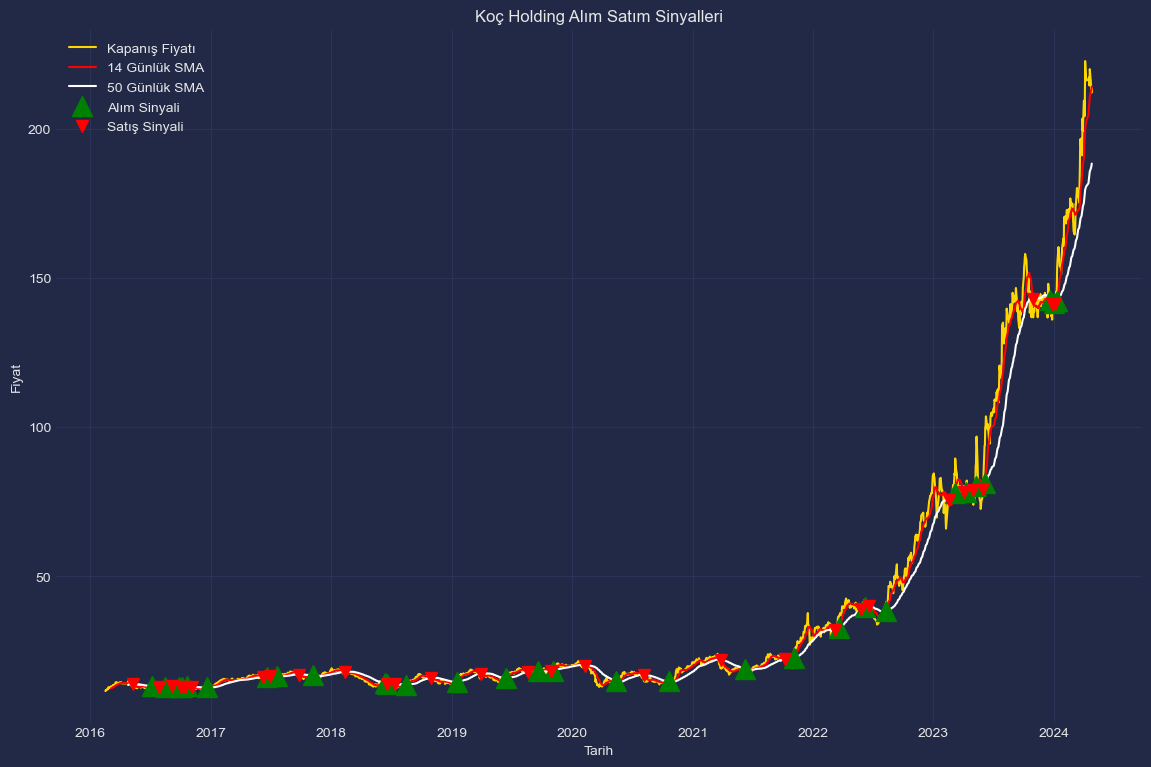

In [52]:

plt.style.use('cyberpunk')
plt.figure(figsize=(14,9))
plt.plot(veri['Close'], label='Kapanış Fiyatı',color="gold",)
plt.plot(veri['14gün'], label='14 Günlük SMA',color = "red",)
plt.plot(veri['50gün'], label='50 Günlük SMA',color ="white" ,)
plt.plot(veri.loc[veri['Al Sinyali'] == 1].index,veri['14gün'][veri['Al Sinyali'] == 1], 
         '^', markersize=15, color='g', lw=0, label='Alım Sinyali')
plt.plot(veri.loc[veri['Satış_Sinyali'] == -1].index, 
         veri['14gün'][veri['Satış_Sinyali'] == -1], 
         'v', markersize=8, color='r', lw=0, label='Satış Sinyali')
plt.title('Koç Holding Alım Satım Sinyalleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.legend()
plt.show()

# Bu sinyalleri daha net görebilmek için son 2 yıla bakalım 

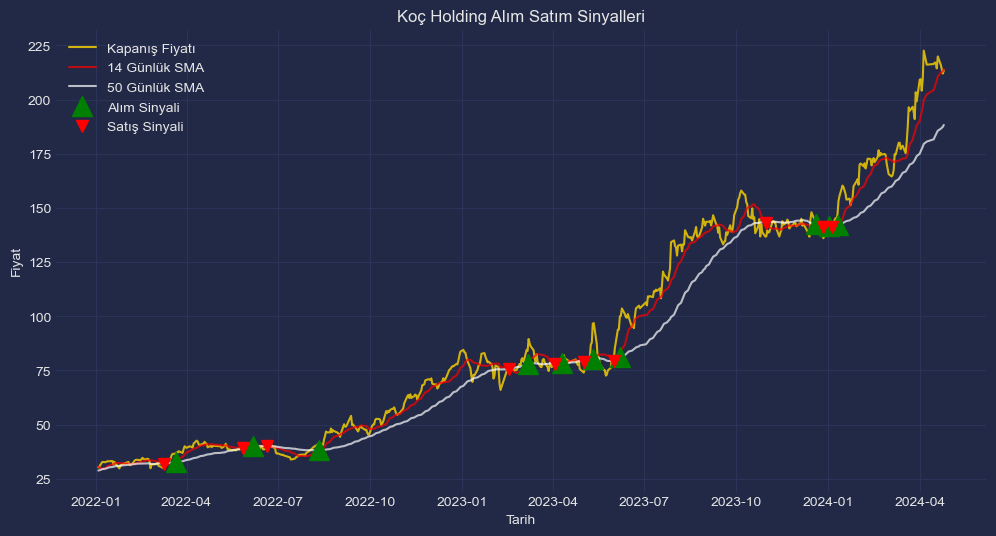

In [51]:
son_2yıl = veri.loc[veri.index > pd.to_datetime('2021-12-31')]
plt.figure(figsize=(12,6))
plt.plot(son_2yıl['Close'], label='Kapanış Fiyatı',color="gold",alpha=0.8)
plt.plot(son_2yıl['14gün'], label='14 Günlük SMA',color = "red",alpha=0.7)
plt.plot(son_2yıl['50gün'], label='50 Günlük SMA',color ="white" ,alpha=0.7)
plt.plot(son_2yıl.loc[veri['Al Sinyali'] == 1].index,son_2yıl['14gün'][son_2yıl['Al Sinyali'] == 1], 
         '^', markersize=15, color='g', lw=0, label='Alım Sinyali')
plt.plot(son_2yıl.loc[son_2yıl['Satış_Sinyali'] == -1].index, 
         son_2yıl['14gün'][son_2yıl['Satış_Sinyali'] == -1], 
         'v', markersize=8, color='r', lw=0, label='Satış Sinyali')
plt.title('Koç Holding Alım Satım Sinyalleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.legend()
plt.show()

# Al Sinyali Olan Tarihlerin İndeksleri

In [44]:
veri.loc[veri["Al Sinyali"] == 1].index

DatetimeIndex(['2016-07-07', '2016-08-16', '2016-09-26', '2016-10-06',
               '2016-10-19', '2016-12-19', '2017-06-19', '2017-07-20',
               '2017-11-07', '2018-06-13', '2018-06-20', '2018-08-15',
               '2019-01-18', '2019-06-14', '2019-09-19', '2019-11-04',
               '2020-05-13', '2020-10-20', '2021-06-10', '2021-11-04',
               '2022-03-21', '2022-06-06', '2022-08-11', '2023-03-07',
               '2023-04-10', '2023-05-11', '2023-06-07', '2023-12-20',
               '2024-01-02', '2024-01-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [46]:
veri.loc[veri["Satış_Sinyali"] == -1].index

DatetimeIndex(['2016-05-11', '2016-07-28', '2016-09-06', '2016-10-03',
               '2016-10-13', '2016-11-04', '2017-06-09', '2017-06-30',
               '2017-09-26', '2018-02-12', '2018-06-18', '2018-07-12',
               '2018-10-31', '2019-04-01', '2019-08-21', '2019-10-28',
               '2020-02-10', '2020-08-05', '2021-03-29', '2021-10-07',
               '2022-03-09', '2022-05-27', '2022-06-20', '2023-02-16',
               '2023-04-03', '2023-05-02', '2023-06-01', '2023-10-31',
               '2023-12-27', '2024-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

# Alım ve Satış Sinyalleri Arasındaki Sürelerin Hesaplanması

In [39]:
for i in range(0,len(veri.loc[veri["Al Sinyali"] == 1].index)):
    süre = veri.loc[veri["Al Sinyali"] == 1].index[i]-veri.loc[veri["Satış_Sinyali"] == -1].index[i]
    süre = süre.days
    print("{:3}. Alım sinyali ile satım sinyali arasında geçen süre: {:}".format(i+1, süre))


  1. Alım sinyali ile satım sinyali arasında geçen süre: 57
  2. Alım sinyali ile satım sinyali arasında geçen süre: 19
  3. Alım sinyali ile satım sinyali arasında geçen süre: 20
  4. Alım sinyali ile satım sinyali arasında geçen süre: 3
  5. Alım sinyali ile satım sinyali arasında geçen süre: 6
  6. Alım sinyali ile satım sinyali arasında geçen süre: 45
  7. Alım sinyali ile satım sinyali arasında geçen süre: 10
  8. Alım sinyali ile satım sinyali arasında geçen süre: 20
  9. Alım sinyali ile satım sinyali arasında geçen süre: 42
 10. Alım sinyali ile satım sinyali arasında geçen süre: 121
 11. Alım sinyali ile satım sinyali arasında geçen süre: 2
 12. Alım sinyali ile satım sinyali arasında geçen süre: 34
 13. Alım sinyali ile satım sinyali arasında geçen süre: 79
 14. Alım sinyali ile satım sinyali arasında geçen süre: 74
 15. Alım sinyali ile satım sinyali arasında geçen süre: 29
 16. Alım sinyali ile satım sinyali arasında geçen süre: 7
 17. Alım sinyali ile satım sinyali arasınd

# Hisse Senedi Alım-Satım Stratejisi ile Elde Edilen Toplam Kazanç Hesaplama

In [40]:
elimizdeki_para = 2500 #tl
hisse_adeti = 0
toplam_kazanc = 0

for i in range(len(veri)):
    if veri["Al Sinyali"][i] == 1:  # Alım sinyali çalışırsa
        adet = int(elimizdeki_para / veri.iloc[i]["Close"])  # Elimizdeki parayla alabildiğimiz kadar hiise aldık
        hisse_adeti += adet  #hisse adediş topladık
        elimizdeki_para -= adet * veri.iloc[i]["Close"]  # alabildiğimiz kadarını aldık elimizdeki paradan çıkardık
    elif veri["Satış_Sinyali"][i] == -1:  # Satış sinyali varsa
        kar = hisse_adeti * veri.iloc[i]["Close"]  #Satış verilen fiyattan elimizdeki hissenin tamamaını sattık
        toplam_kazanc += kar  # Toplam kazanca ekle
        elimizdeki_para += kar  # Satış yapıldığı için elimizdeki paraya satış sonucunu da ekledik
        hisse_adeti = 0  # Elimizdeki hisse senedi miktarını sıfırladık çünkü hepsini sattık

print("Toplam Kazanç:", toplam_kazanc,"₺")

Toplam Kazanç: 115447.81083774567 ₺


            sinyallere göre alım satım yapılmış olsaydı 
<h3>2500 tl -----------------------------------------------------------------> 115447 tl olacaktı.</h3>